The amount of crime at timestep $t+1$ is expected to be:

$$C_{i,t+1} = C_{i,t} + \sum_{j=1}^{N} \frac{k(C_{i,t} - C_{j,t})}{N},$$

where the sumation goes over all the districts ($j=1 \rightarrow N $) neighbouring district $i$.

<font color="pink"> I would expect the difference to be calculated $C_{j,t} - C_{i,t}$ so that it is positive when $C_{j,t} > C_{i,t}$, and then the value of $C_{i,t+1}$ increases due to the influence of $C_{j,t}$. Unless $k$ is always negative? </font>

In [11]:
import random
import numpy as np
from matplotlib import pyplot as plt

We will find the value of $k$ by fitting.

<font color="pink">

Ruben said that he had a library that stores the map information in JSON file-format. It should include the following key-vlaues for my code to work:

- "name" : string
- "neighbours" : list of strings
- "crimes_over_time" : list of integers

</font> 

In [56]:
class District():
    def __init__(self, i, j, crimes0):
        self.i = i              # row
        self.j = j              # column
        self.neighbours = []
        self.crimes = [crimes0]
    
    def find_neigbours(self, map):
        for i in [self.i-1, self.i+1]:
            if i < (map.i_len) and i >= 0:
                self.neighbours.append(map.districts[f"{i},{self.j}"])
        
        for j in [self.j-1, self.j+1]:
            if j < (map.j_len) and j >= 0:
                self.neighbours.append(map.districts[f"{self.i},{j}"])
        
        return self.neighbours
    
    def next_timestep(self, k):
        crime = self.crimes[-1]
        for neighbour in self.neighbours:
            crime += k * (neighbour.crimes[-1] - self.crimes[-1]) / len(self.neighbours)
        self.crimes.append(crime)



In [67]:
class Map():
    def __init__(self, i_len, j_len):
        self.i_len = i_len
        self.j_len = j_len
        self.districts = {}

        for i in range(i_len):
            for j in range(j_len):
                self.districts[f"{i},{j}"] = District(i, j, random.random())

In [58]:
def plot(map):
    i_list, j_list, colours = [], [], []

    for item in map.districts:
        i, j = item.split(",")
        i_list.append(i)
        j_list.append(j)
        colours.append(map.districts[item].crimes[-1])
    plt.scatter(j_list, i_list, s=100, c=colours, marker="s",)
    plt.axis("square")
    plt.show()

In [68]:
def timesteps(map, n):
    for _ in range(n):
        for item in map.districts:
            map.districts[item].next_timestep(0.4)
        

        # plots
        i_list, j_list, colours = [], [], []

        for item in map.districts:
            i, j = item.split(",")
            i_list.append(i)
            j_list.append(j)
            colours.append(map.districts[item].crimes[-1])

        plt.scatter(j_list, i_list, s=100, c=colours, marker="s",)
        plt.axis("square")
        plt.draw()           # update grafiek
        plt.pause(0.001)
        plt.clf()            # clear grafiek

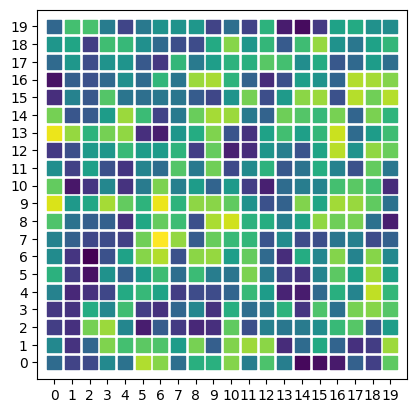

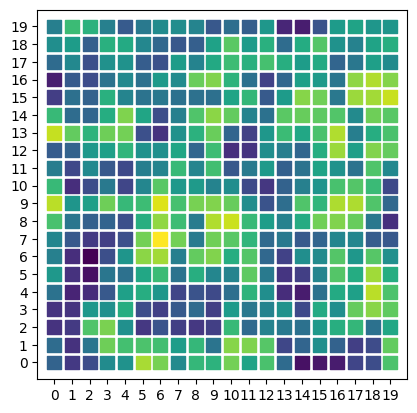

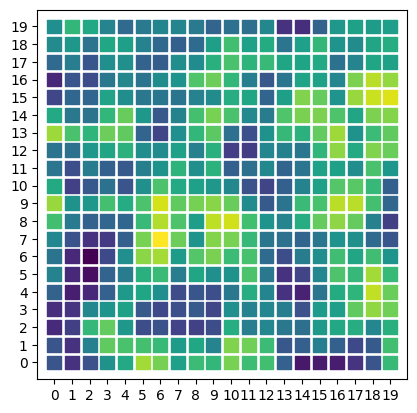

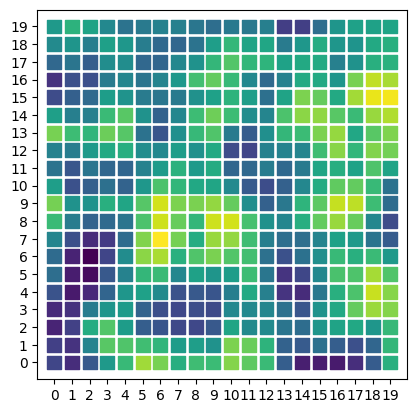

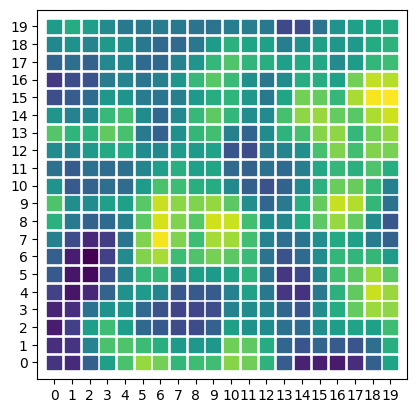

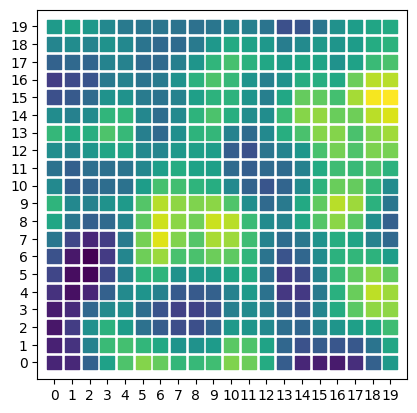

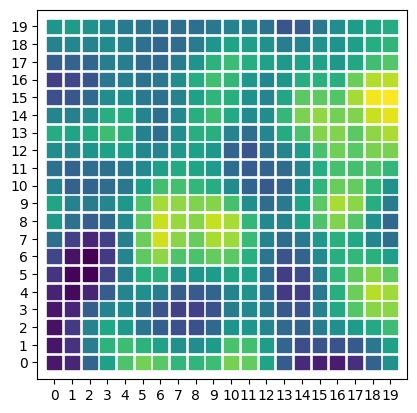

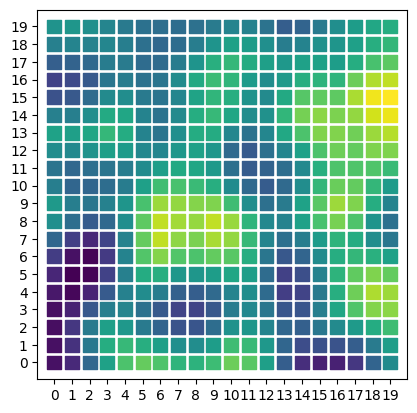

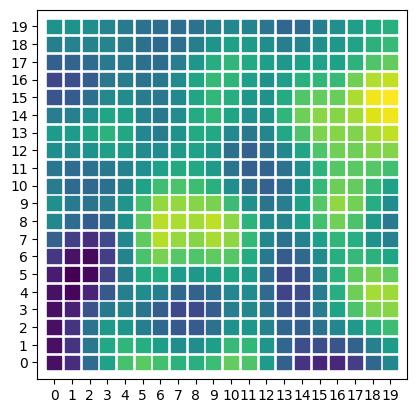

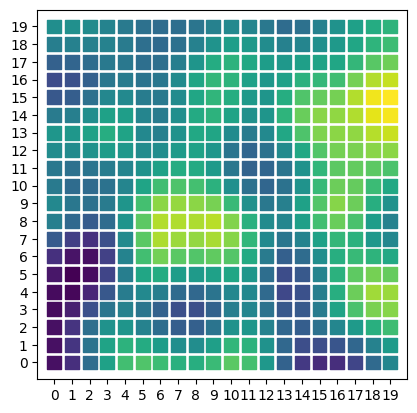

<Figure size 640x480 with 0 Axes>

In [69]:
map = Map(20, 20)
for item in map.districts:
    map.districts[item].find_neigbours(map)

timesteps(map, 10)